# A Demo of this Project’s DataLoaders

This project loads images from a collection of galaxy images from the GZ: CANDELS project.

In [20]:
import torch
import torchvision
from dataset.dataloader import get_data_loaders
from matplotlib import pyplot as plt

In [21]:
train_loader, test_loader = get_data_loaders(base_path='gz_candels_tensors', batch_size=16)

# Get a batch of training data
images, _ = next(iter(train_loader))

# Print the shape of the images
print(images.shape)

torch.Size([16, 3, 224, 224])


# Plot the first batch of images

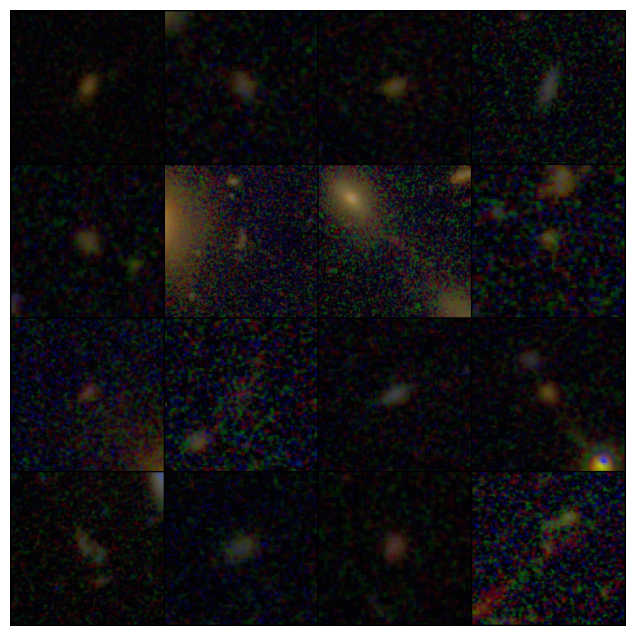

In [22]:
mean = torch.tensor([0.0591, 0.0526, 0.0591])
std = torch.tensor([0.0777, 0.0690, 0.0669])

# Denormalize the images
plot_images = images[:16] * std.view(1, -1, 1, 1) + mean.view(1, -1, 1, 1)

# Create a grid
grid = torchvision.utils.make_grid(plot_images, nrow=4)
grid_np = grid.permute(1, 2, 0).numpy()

# Display the grid
plt.figure(figsize=(8, 8))
plt.imshow(grid_np.clip(0, 1))
plt.axis('off')
plt.show()